# ИУ5-65Б Лаврик Д.Д.

# Научно-исследовательская работа на тему "Прогнозирование успеваемости студента"

## Поиск и выбор набора данных для построения моделей машинного обучения.

В качестве набора данных мы будем использовать набор данных, содержащий данные об успеваемости студента за первые два семестра, а также информацию о его семье - https://www.kaggle.com/datasets/dipam7/student-grade-prediction?resource=download

Датасет состоит из одного файла: `student-mat.csv`

Файл содержит следующие колонки:
* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)
* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

Будем решать задачу регрессии: в качестве целевого признака будем использовать `G3`.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

In [2]:
original_train = pd.read_csv('student-mat.csv', sep=",")

In [3]:
# Удалим дубликаты записей, если они присутствуют
train = original_train.drop_duplicates()

## Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

### Основные характеристики датасетов

In [4]:
# Первые 5 строк датасета
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
# Размер датасета - 395 строк, 33 колонки
train.shape

(395, 33)

In [6]:
# Список колонок
train.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
# Список колонок с типами данных 
train.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
# Проверим наличие пустых значений
train.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

**Вывод. Представленный набор данных не содержит пропусков.**

### Построение графиков для понимания структуры данных

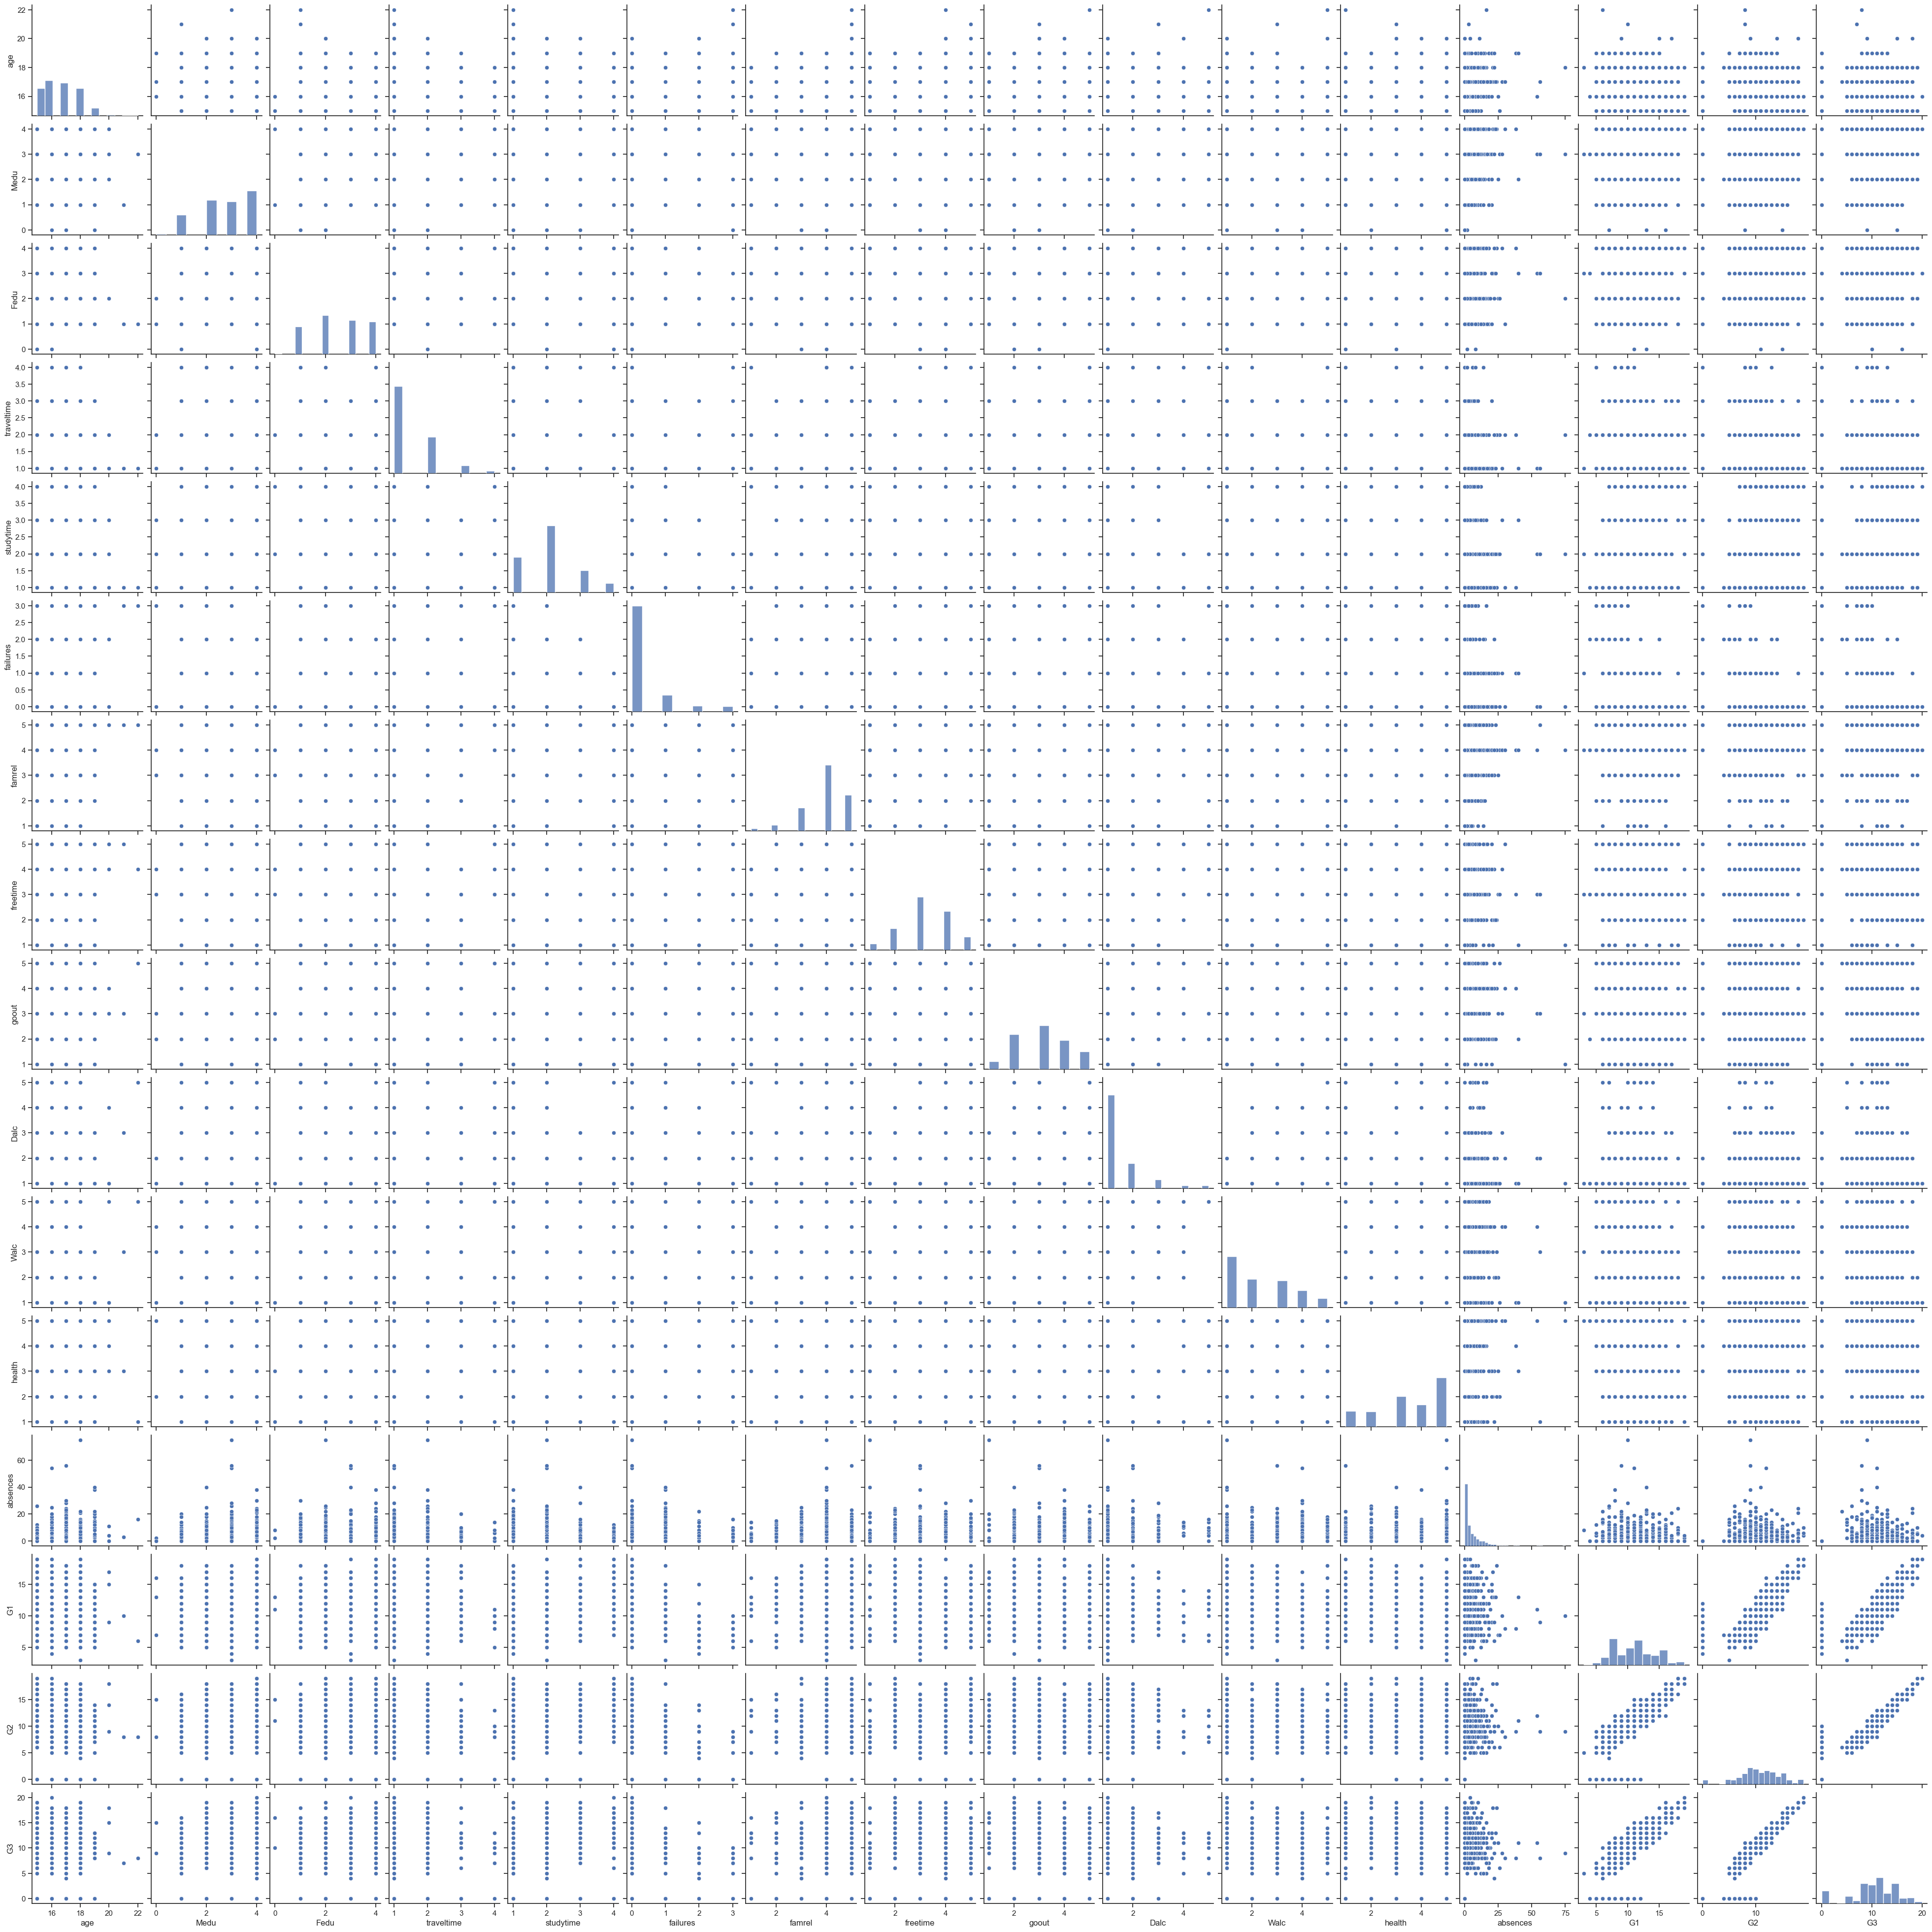

In [9]:
# Парные диаграммы
sns.pairplot(train)

In [10]:
train.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

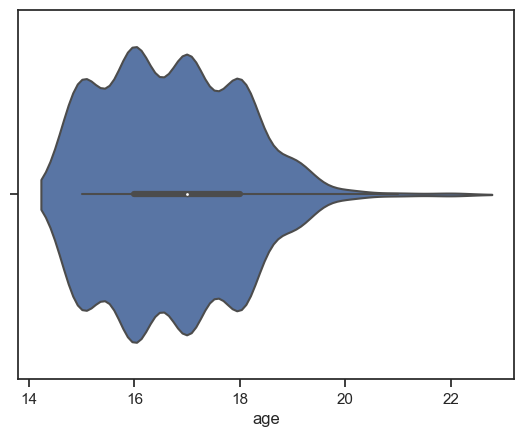

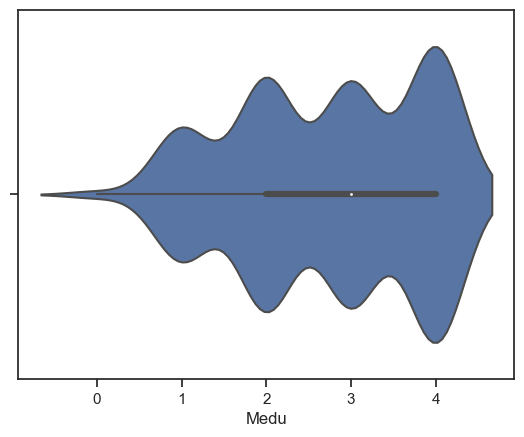

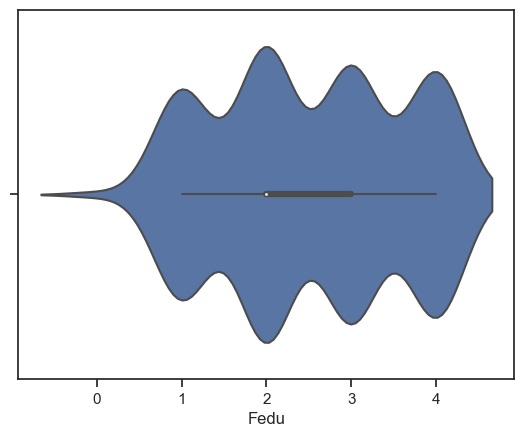

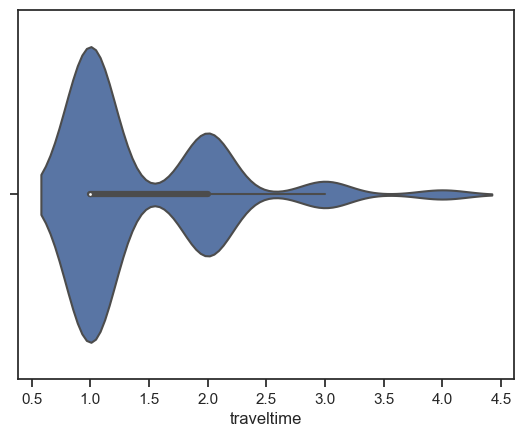

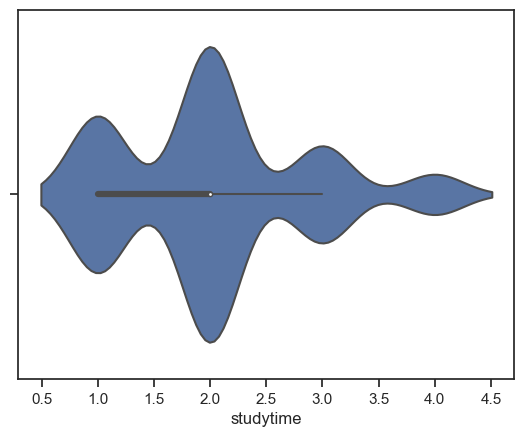

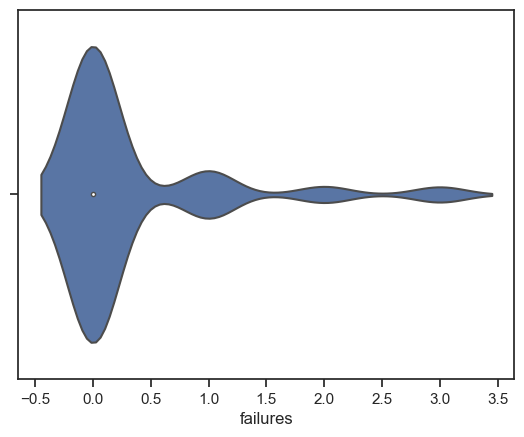

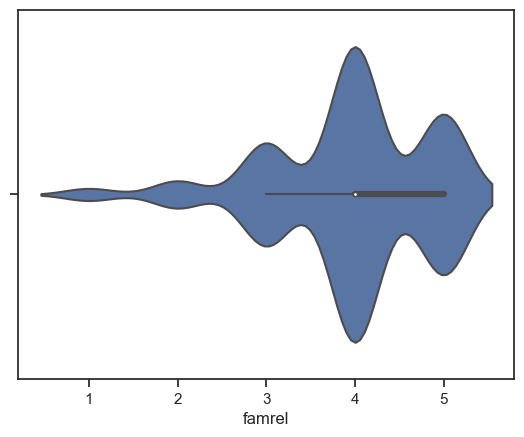

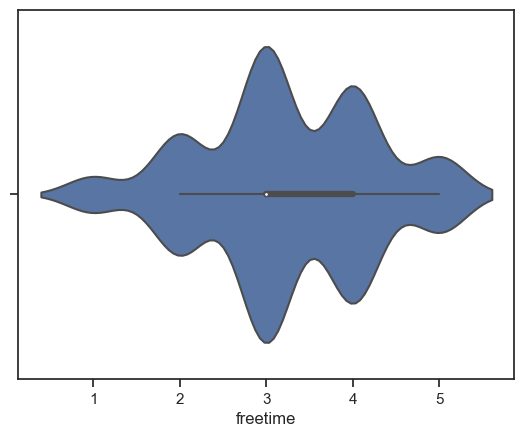

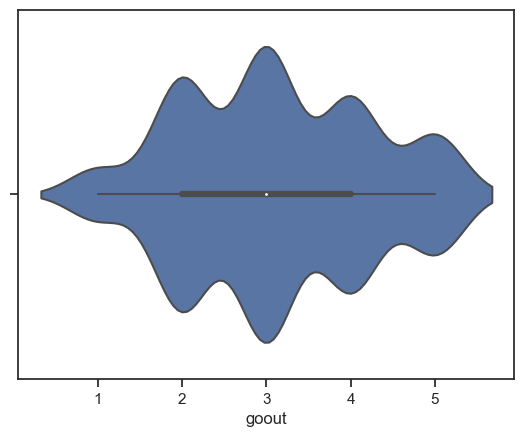

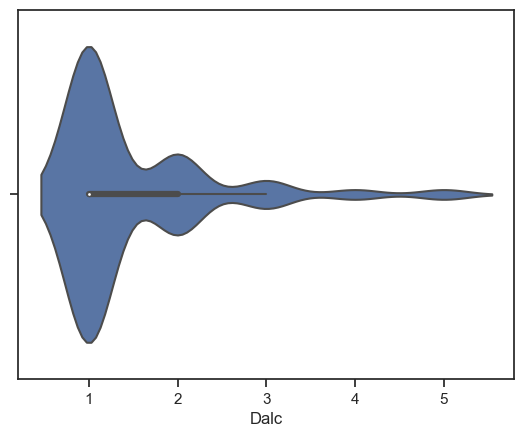

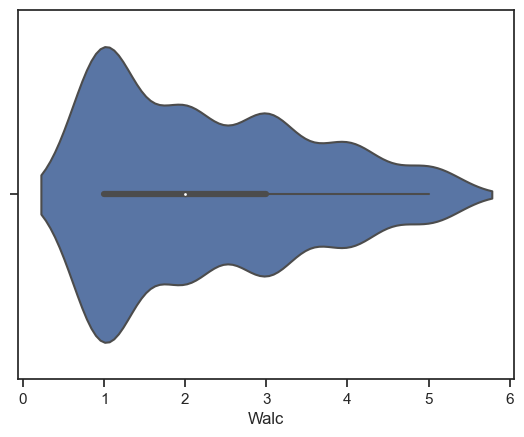

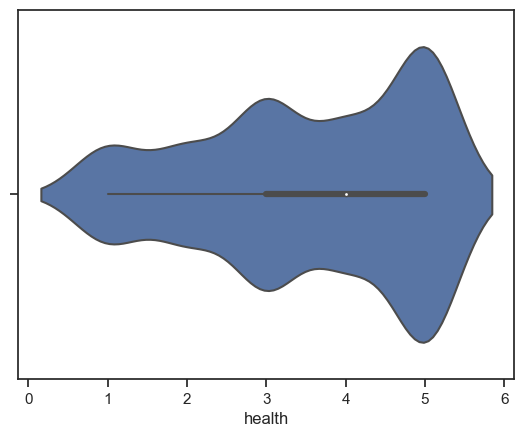

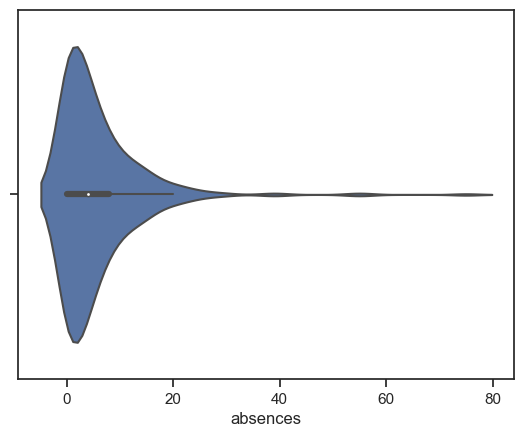

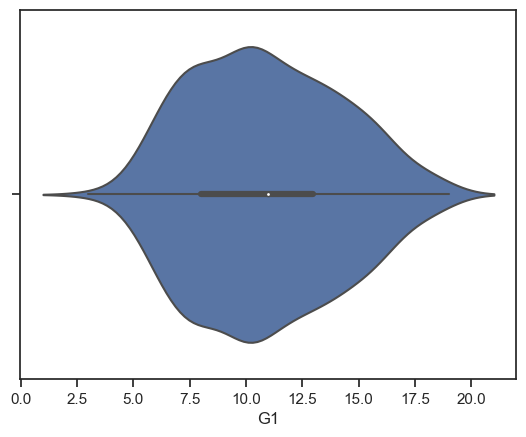

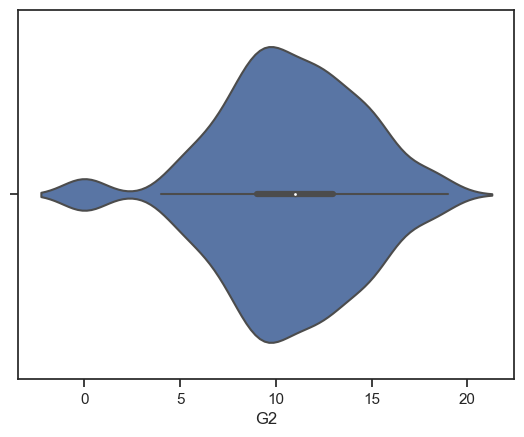

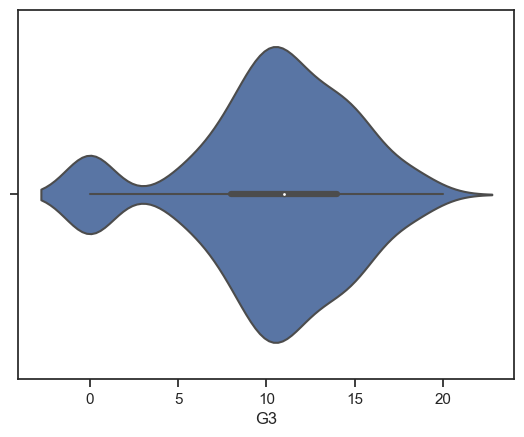

In [11]:
# Скрипичные диаграммы для числовых колонок
for col in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
           'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']:
    sns.violinplot(x=train[col])
    plt.show()

## Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [12]:
train.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Для построения моделей будем использовать все признаки. Присутствуют категориальные признаки `school`, `sex`, `address`, `famsize`, `Pstatus`, `Mjob`, `Fjob`, `reason`, `guardian`, `schoolsup`, `famsup`,
                `paid`, `activities`, `nursery`, `higher`, `internet`, `romantic`.

In [13]:
cat_columns = [cname for cname in train.columns
                        if train[cname].dtype == 'object']

for col in cat_columns:
    print('Уникальные значения признака '+ col + ': ', end='')
    print(train[col].unique())

Уникальные значения признака school: ['GP' 'MS']
Уникальные значения признака sex: ['F' 'M']
Уникальные значения признака address: ['U' 'R']
Уникальные значения признака famsize: ['GT3' 'LE3']
Уникальные значения признака Pstatus: ['A' 'T']
Уникальные значения признака Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Уникальные значения признака Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
Уникальные значения признака reason: ['course' 'other' 'home' 'reputation']
Уникальные значения признака guardian: ['mother' 'father' 'other']
Уникальные значения признака schoolsup: ['yes' 'no']
Уникальные значения признака famsup: ['no' 'yes']
Уникальные значения признака paid: ['no' 'yes']
Уникальные значения признака activities: ['no' 'yes']
Уникальные значения признака nursery: ['yes' 'no']
Уникальные значения признака higher: ['yes' 'no']
Уникальные значения признака internet: ['no' 'yes']
Уникальные значения признака romantic: ['no' 'yes']


In [14]:
cat_columns = [cname for cname in train.columns
                        if train[cname].dtype == 'object']

encoder = LabelEncoder()

for col in cat_columns:
    train[col] = encoder.fit_transform(train[col])

In [15]:
train.dtypes

school        int32
sex           int32
age           int64
address       int32
famsize       int32
Pstatus       int32
Medu          int64
Fedu          int64
Mjob          int32
Fjob          int32
reason        int32
guardian      int32
traveltime    int64
studytime     int64
failures      int64
schoolsup     int32
famsup        int32
paid          int32
activities    int32
nursery       int32
higher        int32
internet      int32
romantic      int32
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [16]:
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


Вспомогательные признаки для улучшения качества моделей мы строить не будем.

Выполним масштабирование данных.

In [17]:
# Числовые колонки для масштабирования
scale_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
              'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'school', 'sex', 'address', 'famsize', 
              'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
              'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [18]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(train[scale_cols])

In [19]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    train[new_col_name] = sc1_data[:,i]

In [20]:
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,reason_scaled,guardian_scaled,schoolsup_scaled,famsup_scaled,paid_scaled,activities_scaled,nursery_scaled,higher_scaled,internet_scaled,romantic_scaled
0,0,0,18,1,0,0,4,4,0,4,...,0.000000,0.5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0,0,17,1,0,1,1,1,0,2,...,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,0,15,1,1,1,1,1,0,2,...,0.666667,0.5,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,0,0,15,1,0,1,4,2,1,3,...,0.333333,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,0,16,1,0,1,3,3,2,2,...,0.333333,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


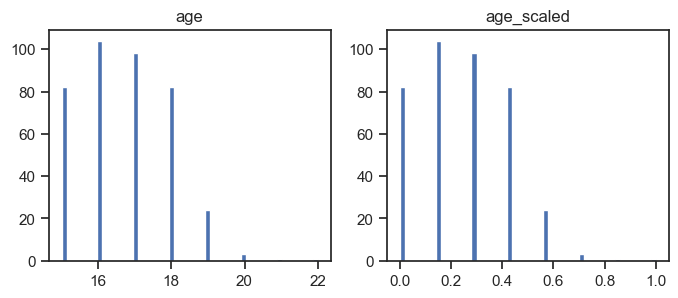

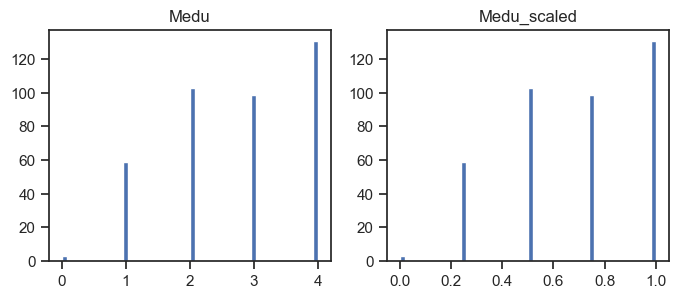

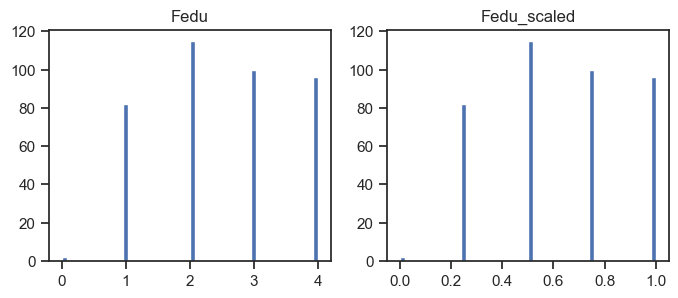

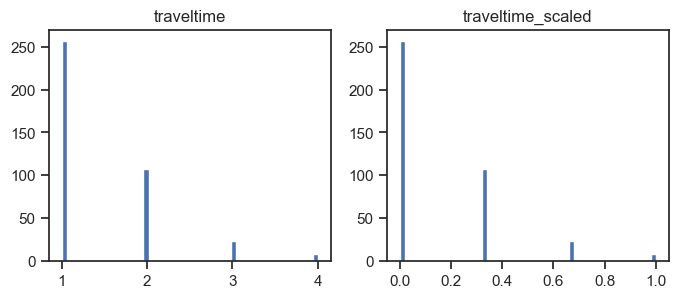

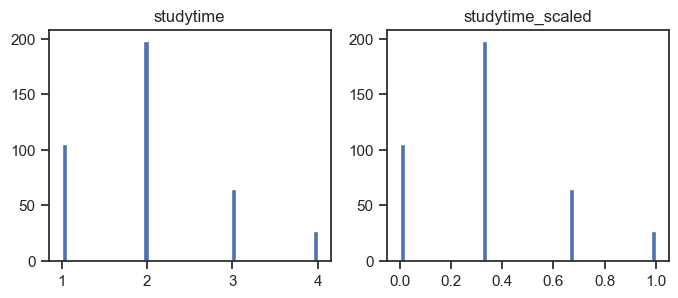

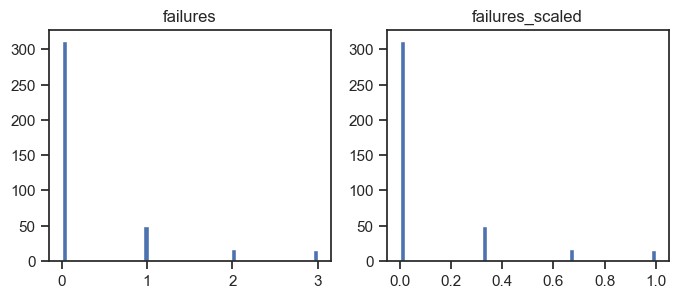

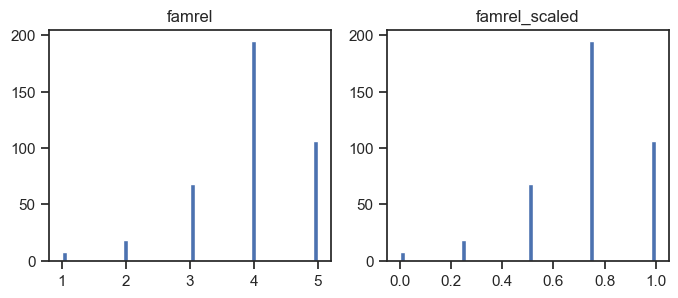

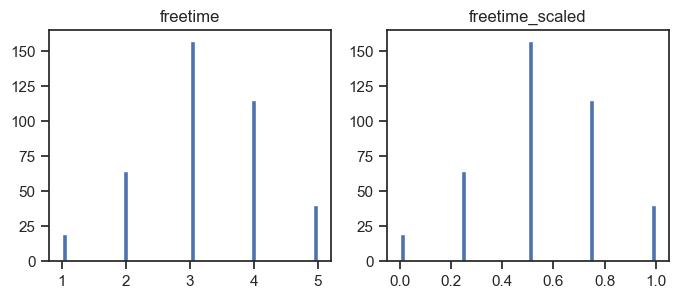

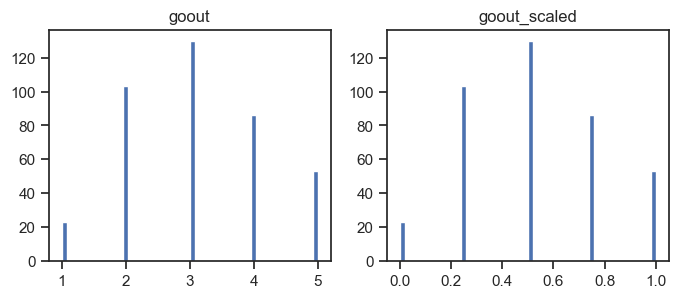

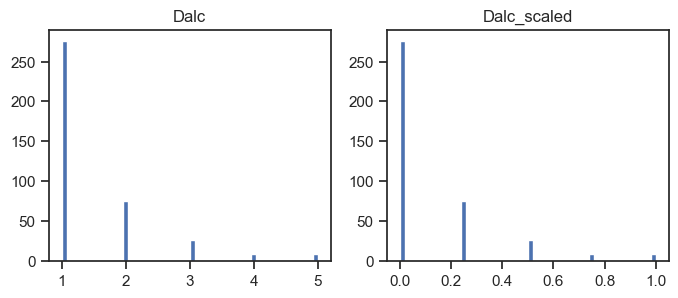

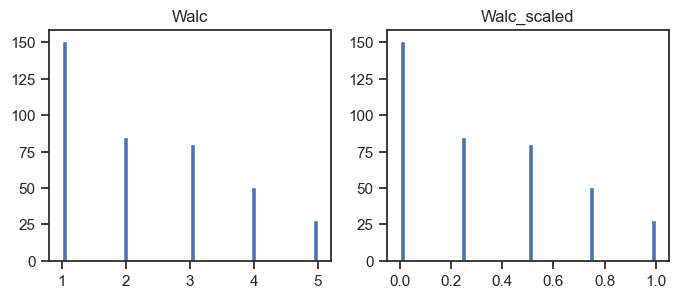

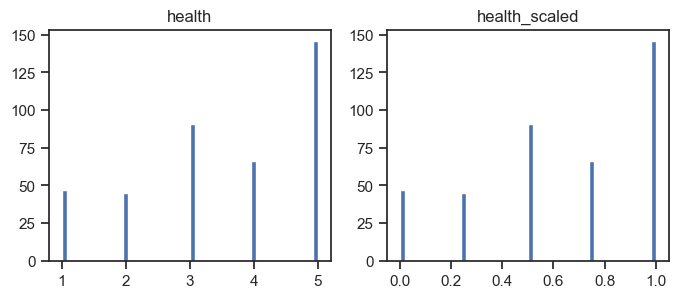

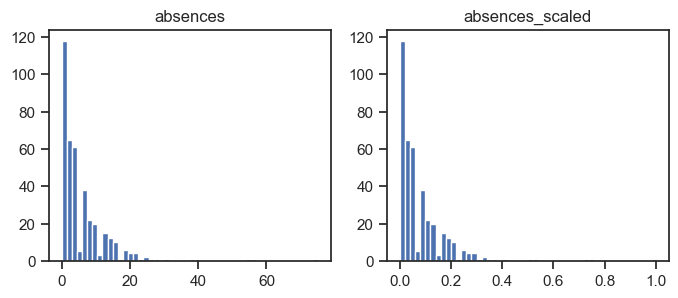

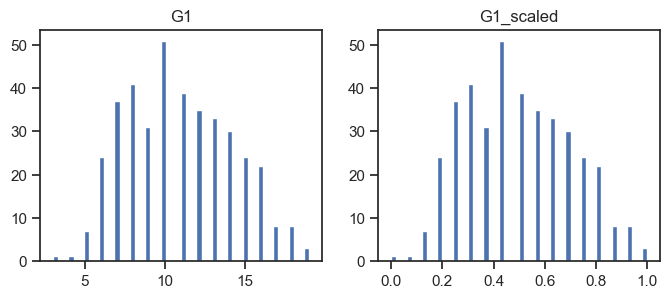

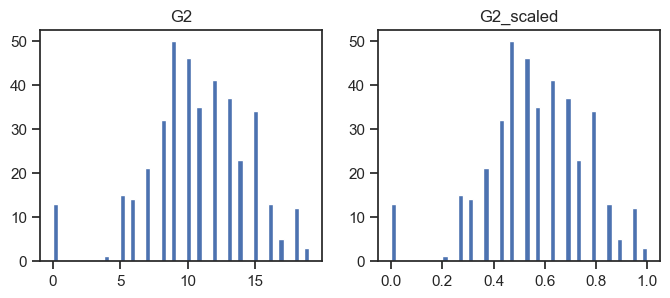

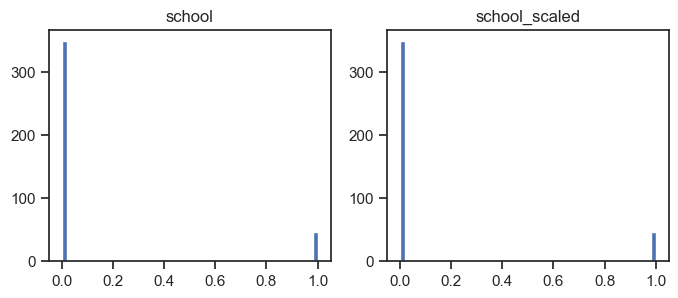

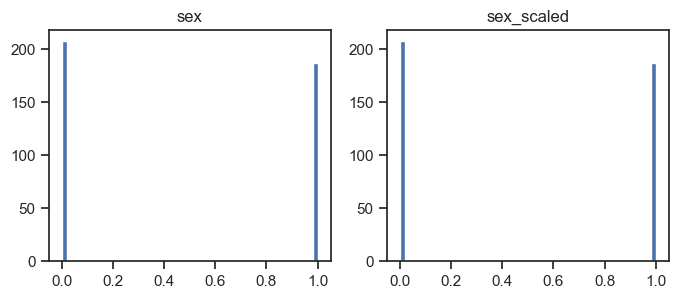

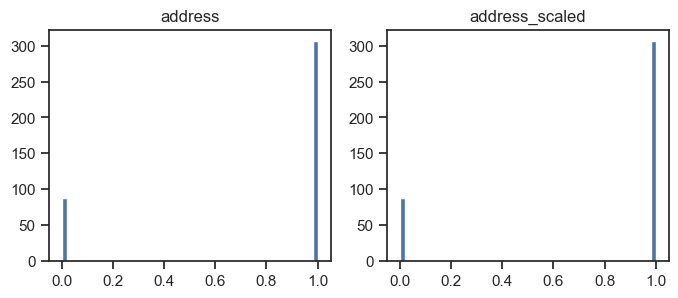

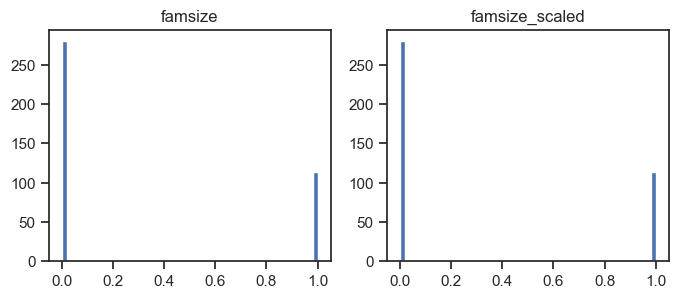

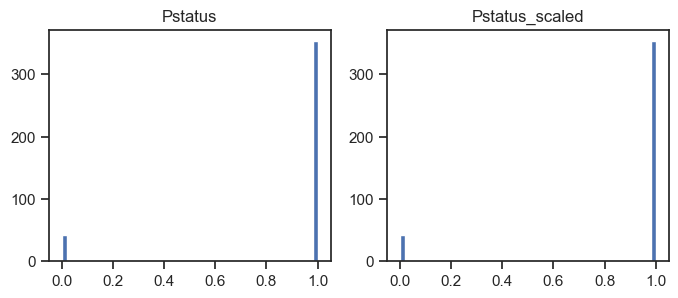

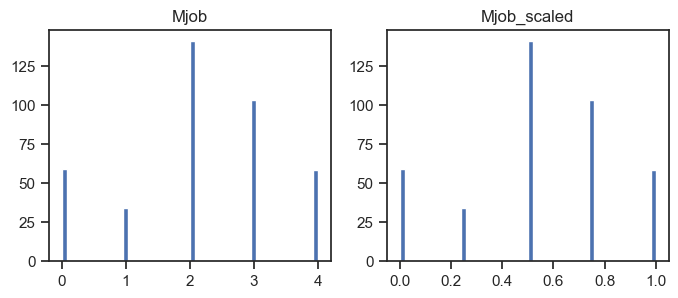

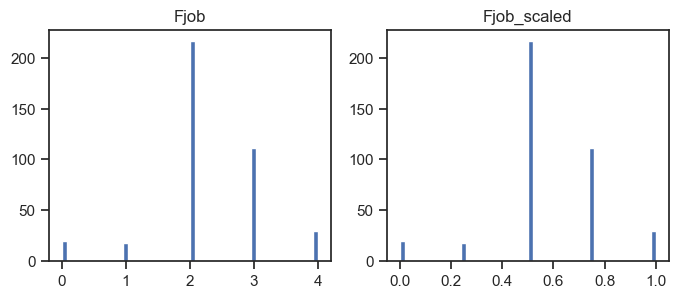

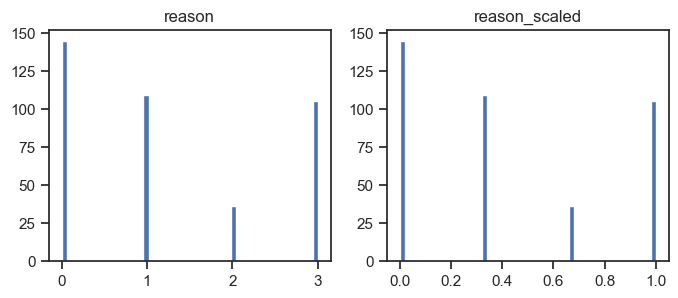

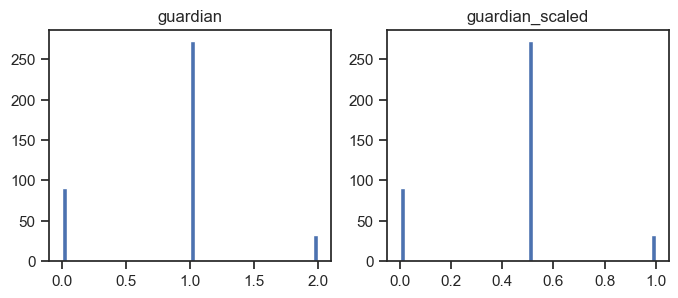

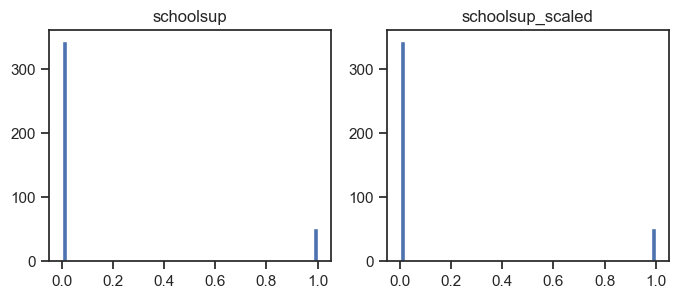

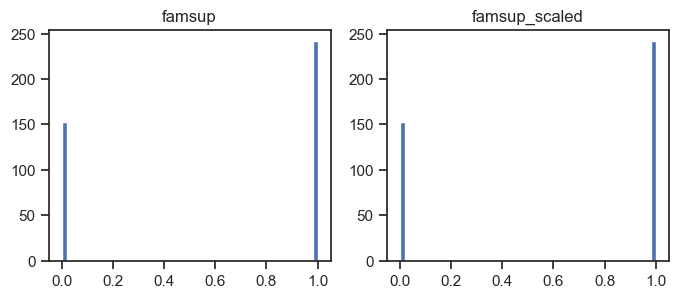

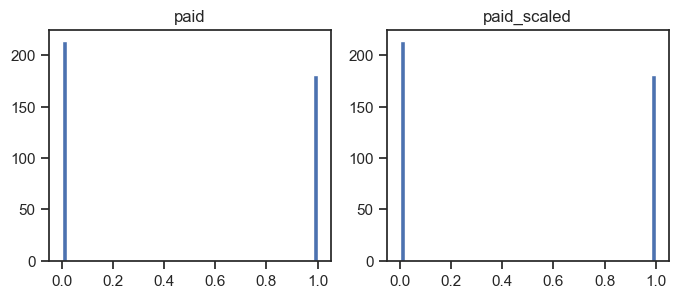

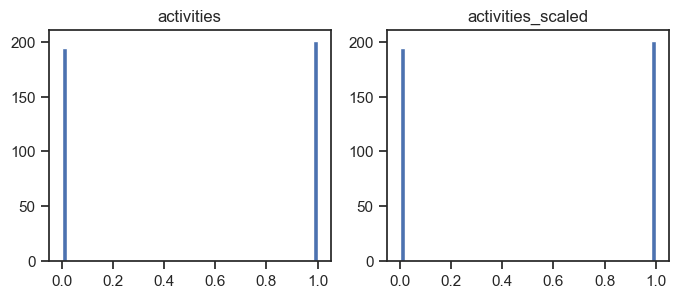

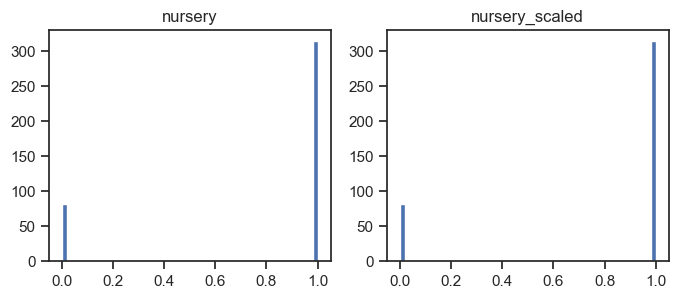

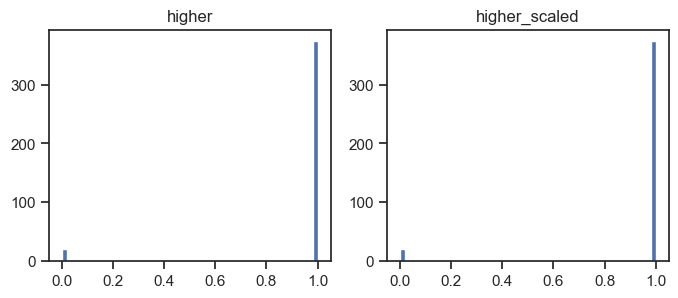

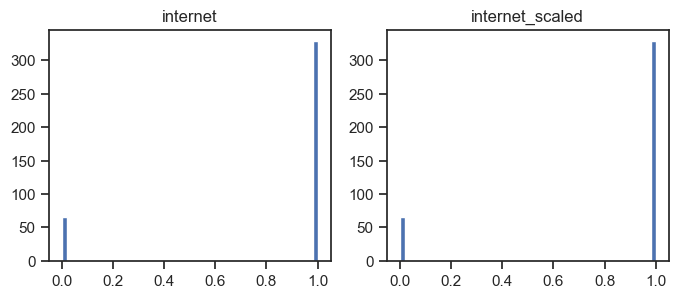

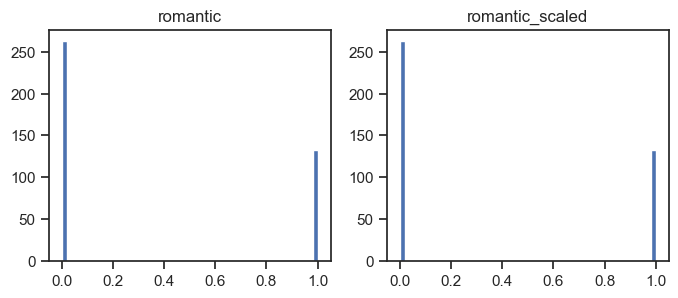

In [21]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(train[col], 50)
    ax[1].hist(train[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [22]:
corr_cols_1 = scale_cols + ['G3']
corr_cols_1

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'G3']

In [23]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['G3']
corr_cols_2

['age_scaled',
 'Medu_scaled',
 'Fedu_scaled',
 'traveltime_scaled',
 'studytime_scaled',
 'failures_scaled',
 'famrel_scaled',
 'freetime_scaled',
 'goout_scaled',
 'Dalc_scaled',
 'Walc_scaled',
 'health_scaled',
 'absences_scaled',
 'G1_scaled',
 'G2_scaled',
 'school_scaled',
 'sex_scaled',
 'address_scaled',
 'famsize_scaled',
 'Pstatus_scaled',
 'Mjob_scaled',
 'Fjob_scaled',
 'reason_scaled',
 'guardian_scaled',
 'schoolsup_scaled',
 'famsup_scaled',
 'paid_scaled',
 'activities_scaled',
 'nursery_scaled',
 'higher_scaled',
 'internet_scaled',
 'romantic_scaled',
 'G3']

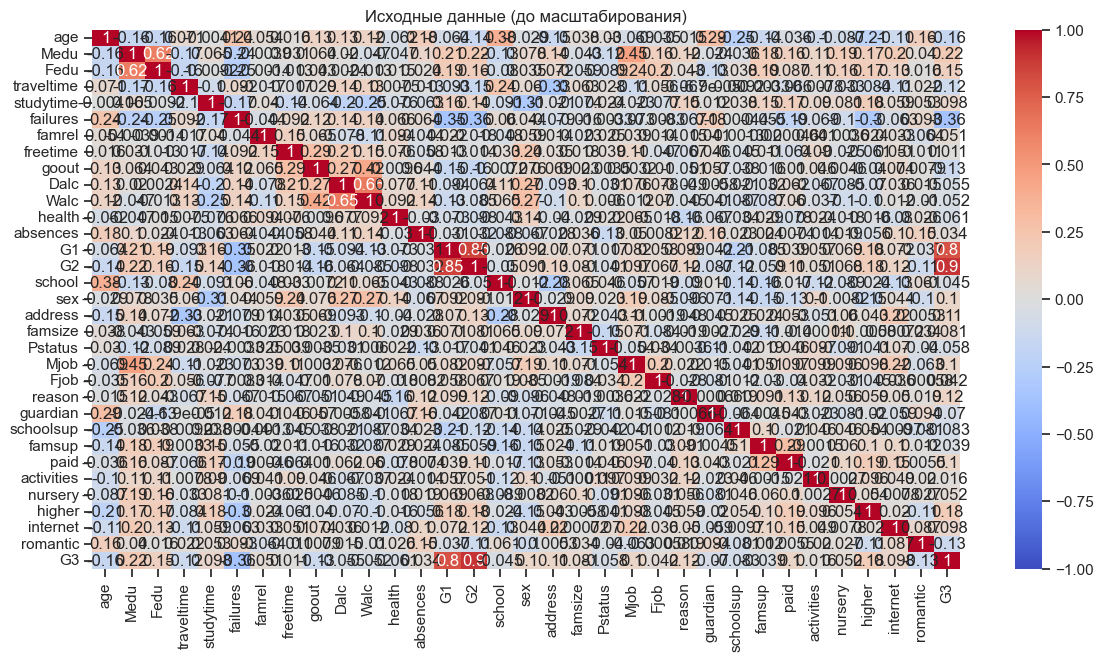

In [24]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(train[corr_cols_1].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

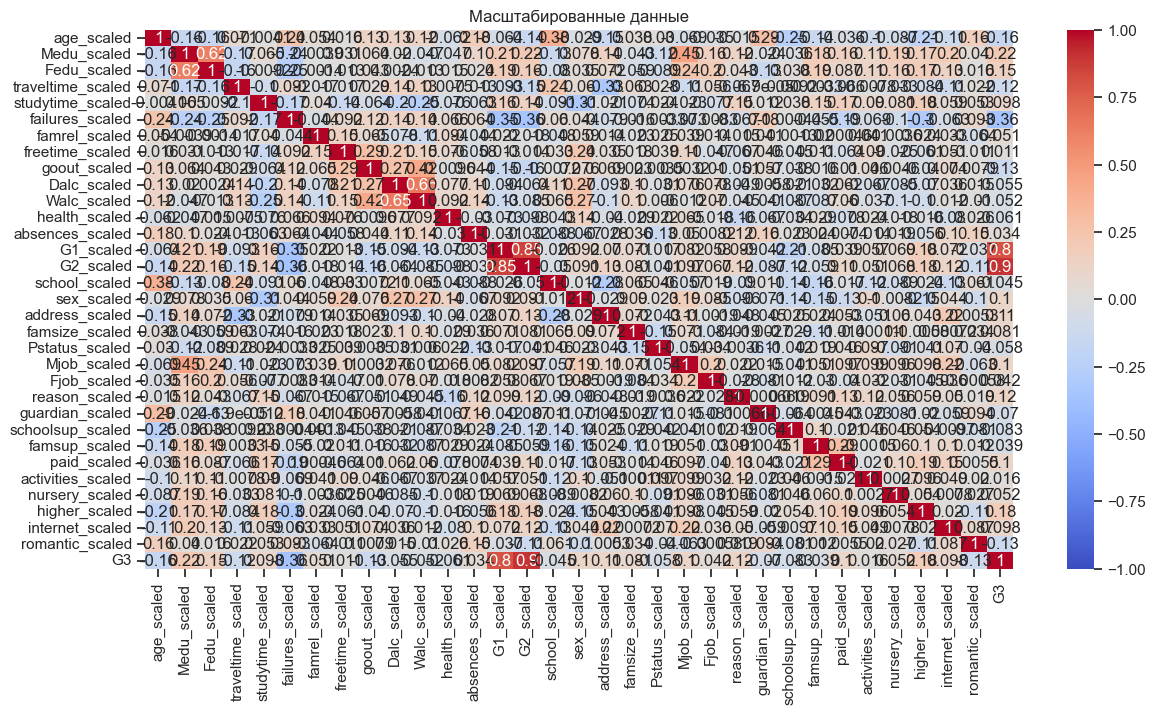

In [25]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(train[corr_cols_2].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
ax.set_title('Масштабированные данные')
plt.show()

In [26]:
print('Признаки, имеющие максимальную по модулю корреляцию с целевым признаком')
best_params = train[corr_cols_1].corr()['G3'].map(abs).sort_values(ascending=False)[1:]
best_params = best_params[best_params.values > 0.15]
best_params

Признаки, имеющие максимальную по модулю корреляцию с целевым признаком


G2          0.904868
G1          0.801468
failures    0.360415
Medu        0.217147
higher      0.182465
age         0.161579
Fedu        0.152457
Name: G3, dtype: float64

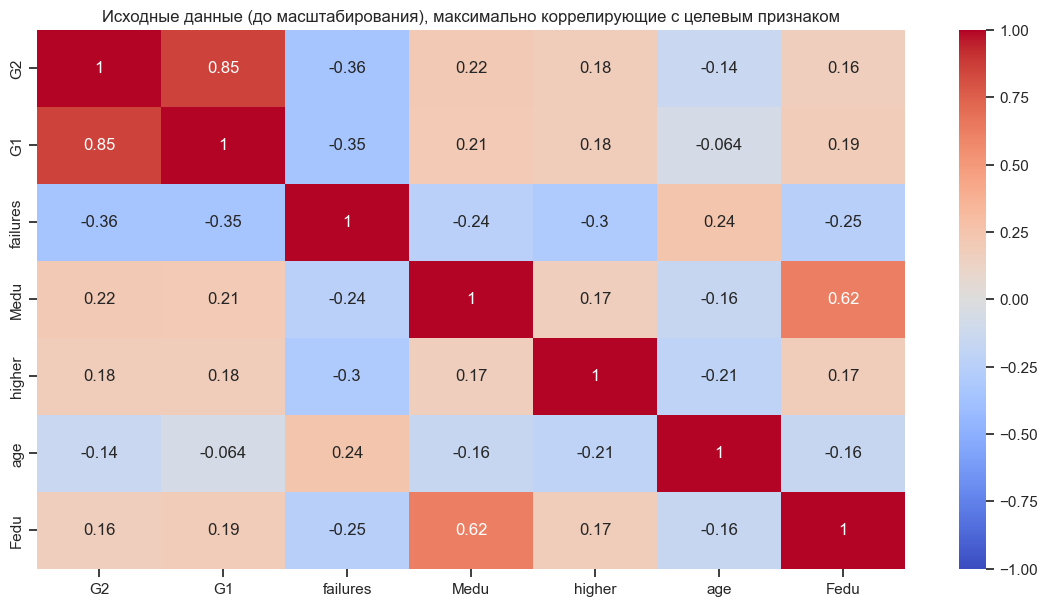

In [27]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(train[best_params.index].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
ax.set_title('Исходные данные (до масштабирования), максимально коррелирующие с целевым признаком')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

* Корреляционные матрицы для исходных и масштабированных данных совпадают.
* Целевой признак регрессии `G3` наиболее сильно коррелирует с успеваемостью за второй семестр (0.9) и за первый семестр (0.8), количеством неудач (0.36), образованием отца (0.15) и образованием матери (0.21), желанием получить высшее образование (0.18) и возрастом (0.16). Эти признаки обязательно следует оставить в модели классификации.
* Небольшие по модулю значения коэффициентов корреляции свидетельствуют о незначительной корреляции между исходными признаками и целевым признаком.

## Выбор метрик для последующей оценки качества моделей. 

### В качестве метрик для решения задачи регрессии будем использовать:

#### [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) - средняя абсолютная ошибка

$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert  y_i - \hat{y_i} \rvert $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Чем ближе значение к нулю, тем лучше качество регрессии.

Основная проблема метрики состоит в том, что она не нормирована.

Вычисляется с помощью функции [mean_absolute_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

#### [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) - средняя квадратичная ошибка

$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Вычисляется с помощью функции [mean_squared_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

#### [Метрика $R^2$ или коэффициент детерминации](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) 

$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки
- $\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $

Вычисляется с помощью функции [r2_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

### Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [28]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## Выбор наиболее подходящих моделей для решения задачи регрессии.

Для задачи регрессии будем использовать следующие модели:
- Линейная регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

## Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [29]:
# Признаки для задачи регрессии
task_regr_cols = ['G2_scaled', 'G1_scaled', 'failures_scaled', 'Medu_scaled', 
                  'higher_scaled', 'age_scaled', 'Fedu_scaled']

In [30]:
# Выборки для задачи регресии
y = train['G3']
X = train[task_regr_cols]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [31]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((276, 7), (119, 7), (276,), (119,))

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

### Решение задачи регрессии

In [32]:
# Модели
regr_models = {'LR': LinearRegression(), 
               'KNN_5':KNeighborsRegressor(n_neighbors=5),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [33]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [34]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(x_train, y_train)
    Y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, Y_pred)
    mse = mean_squared_error(y_test, Y_pred)
    r2 = r2_score(y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('{} \t MAE={}, MSE={}, R2={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(r2, 3)))

In [35]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

C:\Users\igrun\AppData\Local\Temp\ipykernel_22536\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\igrun\AppData\Local\Temp\ipykernel_22536\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\igrun\AppData\Local\Temp\ipykernel_22536\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\igrun\AppData\Local\Temp\ipykernel_22536\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_inde

LR 	 MAE=1.138, MSE=3.155, R2=0.852
KNN_5 	 MAE=1.639, MSE=6.005, R2=0.718
SVR 	 MAE=1.379, MSE=5.205, R2=0.755
Tree 	 MAE=1.588, MSE=6.815, R2=0.68
RF 	 MAE=1.172, MSE=3.27, R2=0.846
GB 	 MAE=1.109, MSE=2.914, R2=0.863


C:\Users\igrun\AppData\Local\Temp\ipykernel_22536\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\igrun\AppData\Local\Temp\ipykernel_22536\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\igrun\AppData\Local\Temp\ipykernel_22536\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\igrun\AppData\Local\Temp\ipykernel_22536\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_inde

## Подбор гиперпараметров для выбранных моделей. 

### Линейная регрессия

In [36]:
x_train.shape

(276, 7)

In [37]:
print(LinearRegression().get_params().keys())

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'positive'])


In [41]:
%%time
grid={'n_jobs':np.logspace(-3,3,3, dtype=int)}
regr_gs_LR = GridSearchCV(LinearRegression(), grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')
regr_gs_LR.fit(x_train, y_train)

CPU times: total: 93.8 ms
Wall time: 92 ms


GridSearchCV(cv=5, error_score='raise', estimator=LinearRegression(),
             param_grid={'n_jobs': array([   0,    1, 1000])},
             scoring='neg_mean_squared_error')

In [42]:
regr_gs_LR.best_estimator_

LinearRegression(n_jobs=0)

In [43]:
regr_gs_LR.best_params_

{'n_jobs': 0}

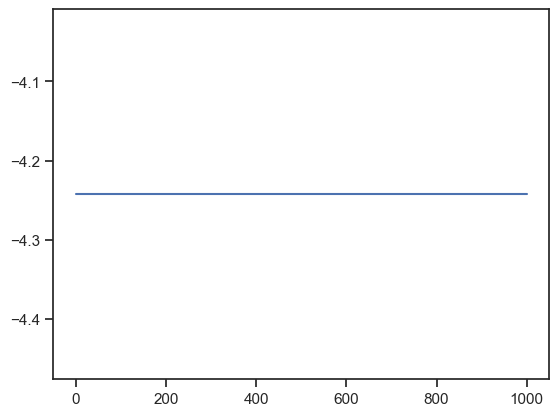

In [44]:
plt.plot(np.logspace(-3,3,3), regr_gs_LR.cv_results_['mean_test_score'])

### Метод ближайших соседей

In [45]:
print(KNeighborsRegressor().get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [46]:
n_range = np.array(range(1,220,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
          27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
          40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
          53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
          66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
          79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
          92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
         105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
         118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
         131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
         144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
         157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
         170, 171, 172,

In [47]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(x_train, y_train)

CPU times: total: 36.3 s
Wall time: 11 s


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92...
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219])}],
             scoring='neg_mean_squared_error')

In [48]:
# Лучшая модель
regr_gs.best_estimator_

KNeighborsRegressor(n_neighbors=13)

In [49]:
# Лучшее значение параметров
regr_gs.best_params_

{'n_neighbors': 13}

In [50]:
regr_gs_best_params_txt = str(regr_gs.best_params_['n_neighbors'])
regr_gs_best_params_txt

'13'

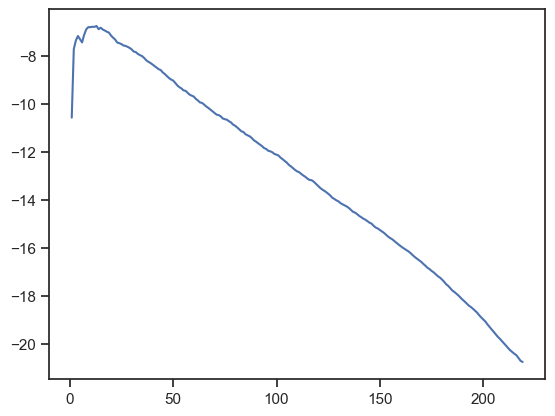

In [51]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

### Машина опорных векторов

In [52]:
print(SVR().get_params().keys())

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])


In [53]:
params = {'C': np.array(range(1,2000,100))}

SVR_gs = GridSearchCV(SVR(), params, cv=5, scoring='neg_mean_squared_error')
SVR_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
       1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901])},
             scoring='neg_mean_squared_error')

In [54]:
# Лучшая модель
SVR_gs.best_estimator_

SVR(C=101)

In [55]:
# Лучшее значение параметров
SVR_gs.best_params_

{'C': 101}

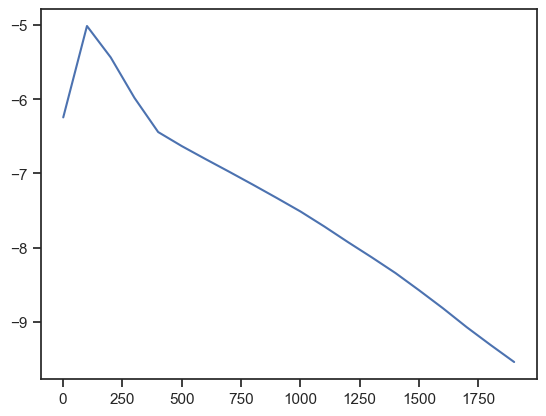

In [56]:
# Изменение качества на тестовой выборке
plt.plot(np.array(range(1,2000,100)), SVR_gs.cv_results_['mean_test_score'])

### Решающее дерево

In [57]:
print(DecisionTreeRegressor().get_params().keys())

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])


In [58]:
params = {"max_depth":range(1,20), "max_features":range(1,5)}

Tree_gs = GridSearchCV(DecisionTreeRegressor(), params, cv=5, scoring='neg_mean_squared_error')
Tree_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 20),
                         'max_features': range(1, 5)},
             scoring='neg_mean_squared_error')

In [59]:
# Лучшая модель
Tree_gs.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features=4)

In [60]:
# Лучшее значение параметров
Tree_gs.best_params_

{'max_depth': 3, 'max_features': 4}

### Градиентный бустинг

In [61]:
print(GradientBoostingRegressor().get_params().keys())

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])


In [62]:
GB_params={"max_features":range(1,5), "max_leaf_nodes":range(2,22)}
GB_gs = GridSearchCV(GradientBoostingRegressor(), GB_params, cv=5, scoring='neg_mean_squared_error')
GB_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_features': range(1, 5),
                         'max_leaf_nodes': range(2, 22)},
             scoring='neg_mean_squared_error')

In [63]:
# Лучшая модель
GB_gs.best_estimator_

GradientBoostingRegressor(max_features=2, max_leaf_nodes=6)

In [64]:
# Лучшее значение параметров
GB_gs.best_params_

{'max_features': 2, 'max_leaf_nodes': 6}

### Случайный лес

In [65]:
print(RandomForestRegressor().get_params().keys())

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [66]:
RF_params={"max_leaf_nodes":range(2,12), "max_samples":range(2,22)}
RF_gs = GridSearchCV(RandomForestRegressor(), RF_params, cv=5, scoring='neg_mean_squared_error')
RF_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_leaf_nodes': range(2, 12),
                         'max_samples': range(2, 22)},
             scoring='neg_mean_squared_error')

In [74]:
print(RF_params)
# Лучшая модель
RF_gs.best_estimator_

{'max_leaf_nodes': range(2, 12), 'max_samples': range(2, 22)}


RandomForestRegressor(max_leaf_nodes=11, max_samples=21)

## Сравнение качества полученных моделей с качеством baseline-моделей.

In [68]:
models_grid = { 'LinR_new':regr_gs_LR.best_estimator_,
               'KNN_new':regr_gs.best_estimator_,
                'SVR_new':SVR_gs.best_estimator_,
              'Tree_new':Tree_gs.best_estimator_,
               'RF_new':RF_gs.best_estimator_,
              'GB_new':GB_gs.best_estimator_
              }

In [69]:
for model_name, model in models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

C:\Users\igrun\AppData\Local\Temp\ipykernel_22536\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\igrun\AppData\Local\Temp\ipykernel_22536\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\igrun\AppData\Local\Temp\ipykernel_22536\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\igrun\AppData\Local\Temp\ipykernel_22536\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_inde

LinR_new 	 MAE=1.138, MSE=3.155, R2=0.852
KNN_new 	 MAE=1.632, MSE=5.501, R2=0.741
SVR_new 	 MAE=1.04, MSE=3.23, R2=0.848
Tree_new 	 MAE=2.29, MSE=8.967, R2=0.578
RF_new 	 MAE=1.438, MSE=4.194, R2=0.803
GB_new 	 MAE=1.109, MSE=2.843, R2=0.866


C:\Users\igrun\AppData\Local\Temp\ipykernel_22536\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\igrun\AppData\Local\Temp\ipykernel_22536\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\igrun\AppData\Local\Temp\ipykernel_22536\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\igrun\AppData\Local\Temp\ipykernel_22536\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_inde

## Формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [70]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MSE', 'R2'], dtype=object)

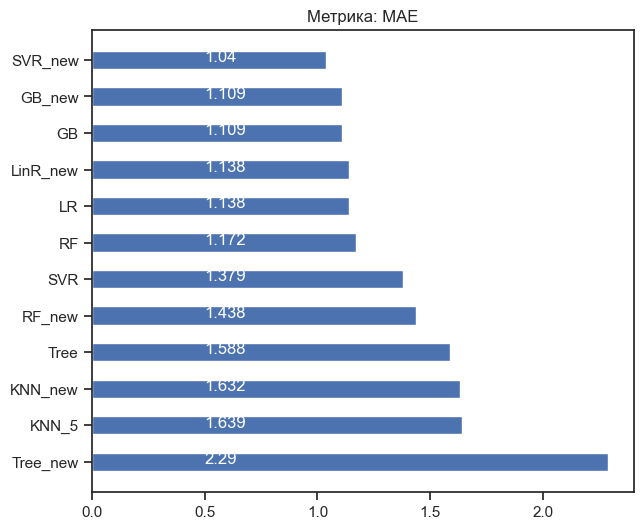

In [71]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

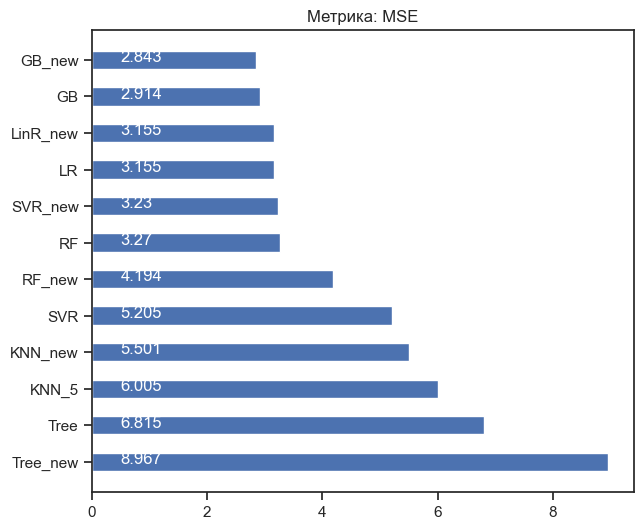

In [72]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

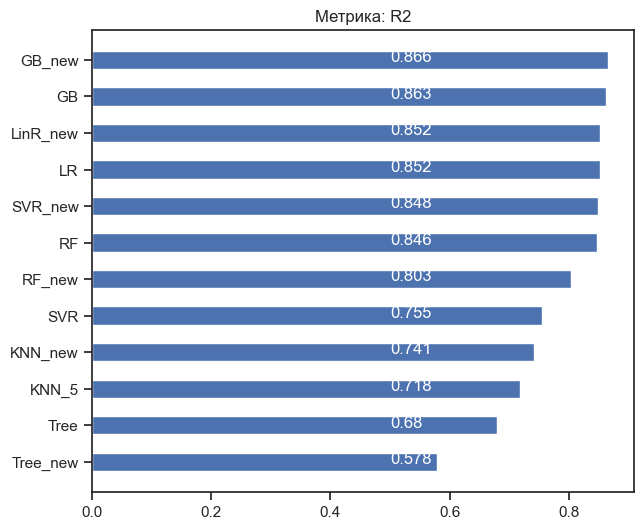

In [73]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))

**Вывод: лучшими оказались модели на основе линейной регресии и градиентного бустинга. При отдельных запусках вместо градиентного бустинга оказывается лучшей модель опорных векторов.**
